# Exploratory data analysis- Heart disease

## The Data

This dataset contains information about contains diagnoses of heart disease patients.Heart disease prevention is a major health concern, not only in the USA Worth but also across the world. It’s vital that people learn to identify and manage heart disease risk factors, such as heart-healthy eating, regular exercise, and seeing a doctor to measure blood pressure, cholesterol, and weight. 

According to World Health Organisation (WHO), heart diseases, also a part of cardiovascular diseases, are the number 1 cause of death globally- killing 17.9 millions of lives every year. People who are suffering from heart diseases are known to demonstrate high blood pressure, lipids, glucose as well as obesity and overweight issues. The ability to identify these high risk factors will ensure that the patients receieve appropriate medical care and prevent premature deaths.

__Data Source:__ 
 - This Data set was collected from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

__Creators:__

 - Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
 - University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
 - University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
 - V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
 
__Attribute Information:__
1. Age
2. Sex: (1 = Male, 0 = Female)
3. cp(chest pain type):
  - 1 = typical angina
  - 2 = atypical angina
  - 3 = non-anginal pain
  - 4 = asymptomatic
4. trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
5. chol: Serum cholestoral in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl 
    - 1 = true
    - 0 = false
7. restecg: Resting electrocardiographic results
   - 0: Normal
   - 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina 
    - 1 = yes 
    - 0 = no
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
    - 1: Upsloping
    - 2: Flat
    - 3: Downsloping
12. ca: Number of major vessels (0-3) colored by flourosopy
13. thal: Thalium heart scan
    - 1: Normal
    - 2: Fixed defect
    - 3: Reversable defect
14. target: Diagnosis of heart disease
    - 1: Yes
    - 0: No

### Reading Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import norm, uniform
from statsmodels.graphics.gofplots import qqplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/devrepublik/data-science-course/master/data/boosting/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Dealing with Null value

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Cheking again is there any null value
assert df.dtypes.any() != object
df.isnull().values.any() 

False

In [8]:
#Checking for unique values in columns
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

 __Initial observation__

There are 303 records and 14 columns are present. Mixture of Integer and float datatypes datas are present. basically Dataset consisits numerical columns
And There are no missing values present in any of the columns
When we looked at unique values in each columns, barring trestbps, chol, thalach, oldpeak all remaining columns needs to be converted to categorical type
We need to predit presence (value 1) or absence (value 0) of heart disease in the patient which are given in target column.
Since we know the target class, this is supervised learning, typical binary Classification modelling.

Now that we know there is no null value. We will change All the columns have catagorical value from given digit indicator to name. so we can understand it without any confusion.

In [9]:
#convert columns to category
columns_to_category= ['ca', 'thal','sex','cp','fbs','restecg','exang','slope']
df[columns_to_category]= df[columns_to_category].astype('category')

Now we will change some column names for better understanding.

In [10]:
df.rename(columns={'cp': 'chestPain', 'trestbps': 'restingBP', 'chol': 'cholesterol',
                   'fbs': 'bloodSuger', 'thalach': 'maxHR', 'ca': 'majorVessels',
                   'thal': 'heartScan', 'target': 'diagnosis'}, inplace=True)
df.head()

,age,sex,chestPain,restingBP,cholesterol,bloodSuger,restecg,maxHR,exang,oldpeak,slope,majorVessels,heartScan,diagnosis
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Statistical summary
 This section will show descriptive statistics of numerical variables.

In [11]:
df.describe()

,age,restingBP,cholesterol,maxHR,oldpeak,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


 __Observation__
 1. mean and median of age, resting BP, oldpeaks are almost similar. Outliers may have less impact.
 2. In other two columns mean is higher than median which tells outliers might have present. Data Distribution is skewed towards right.

## EDA 

Now we will visualize variables. and trying to do some hypothesis.

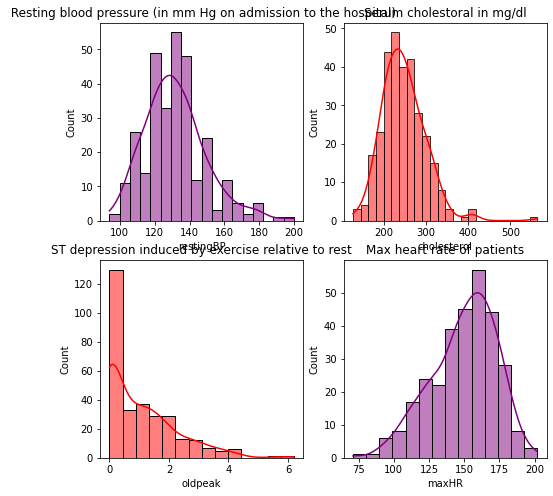

In [12]:
plt.figure(figsize=(8,8))
plt.subplot(221)
sns.histplot(df['restingBP'],color = "purple", kde=True)
plt.title(' Resting blood pressure (in mm Hg on admission to the hospital)')

plt.subplot(222)
sns.histplot(df['cholesterol'],color = "Red", kde=True)
plt.title('Serum cholestoral in mg/dl')

plt.subplot(223)
sns.histplot(df['oldpeak'],color = "red", kde=True)
plt.title('ST depression induced by exercise relative to rest')

plt.subplot(224)
sns.histplot(df['maxHR'],color = "purple", kde=True)
plt.title('Max heart rate of patients')
plt.show()

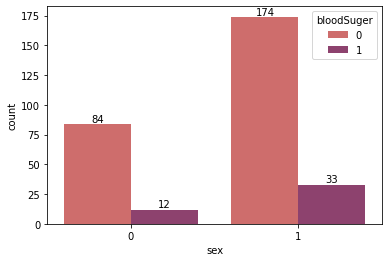

In [13]:
ax = sns.countplot(x='sex', hue='bloodSuger',palette='flare', data=df)
for container in ax.containers:
    ax.bar_label(container)

Here we can see How many male or female are suffering from diabetes.

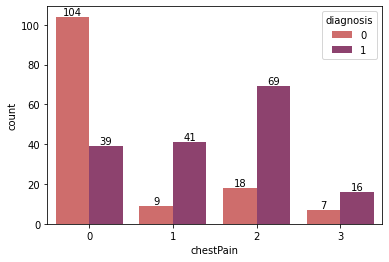

In [14]:
ax = sns.countplot(x='chestPain', hue='diagnosis',palette='flare', data=df)
for container in ax.containers:
    ax.bar_label(container)

From here we can see petient who heart failuers have what kind chest pain.

Text(0.5, 1.0, 'Age of patients with heart disease')

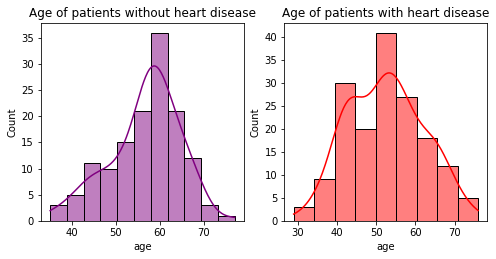

In [15]:
plt.figure(figsize=(8,8))
plt.subplot(221)
sns.histplot(df[df['diagnosis']==0].age , color ='purple', kde=True)
plt.title('Age of patients without heart disease')

plt.subplot(222)
sns.histplot(df[df['diagnosis']==1].age , color ='red', kde=True)
plt.title('Age of patients with heart disease')

Here we can see from age 45-55 old have more heart disease.

   - We will try to find that chance of having heart failure with chest pain and other symptoms.

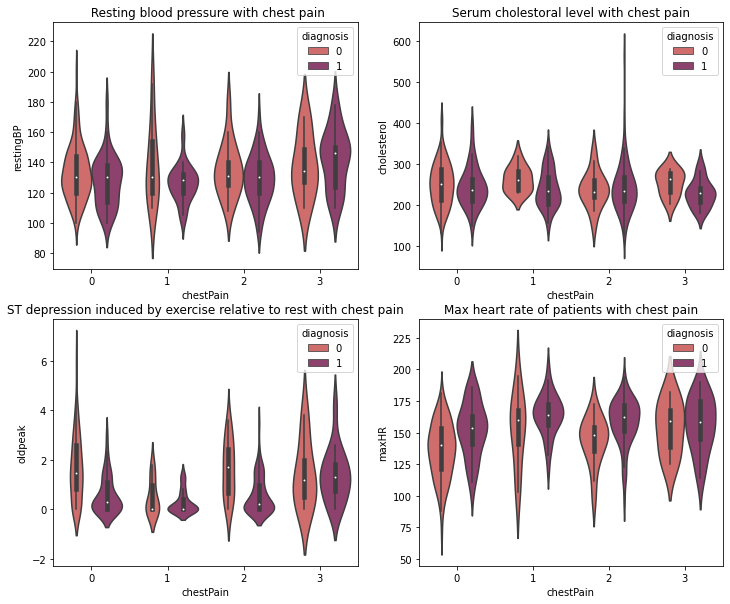

In [16]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.violinplot(data=df, x="chestPain", y="restingBP",palette='flare', hue="diagnosis")
plt.title(' Resting blood pressure with chest pain')

plt.subplot(222)
sns.violinplot(data=df, x="chestPain", y="cholesterol",palette='flare', hue="diagnosis")
plt.title('Serum cholestoral level with chest pain')

plt.subplot(223)
sns.violinplot(data=df, x="chestPain", y="oldpeak",palette='flare', hue="diagnosis")
plt.title('ST depression induced by exercise relative to rest with chest pain')

plt.subplot(224)
sns.violinplot(data=df, x="chestPain", y="maxHR",palette='flare', hue="diagnosis")
plt.title('Max heart rate of patients with chest pain')
plt.show()

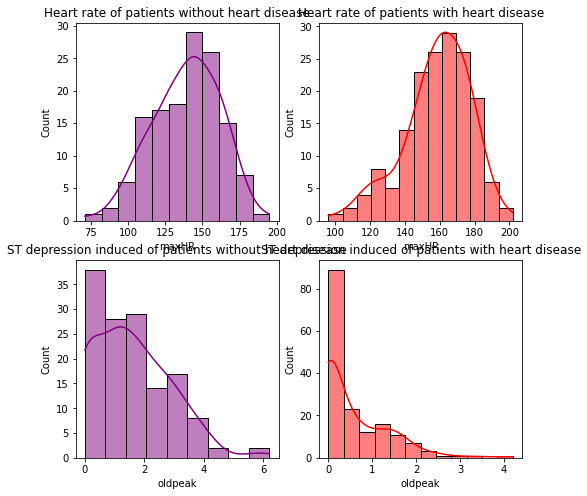

In [17]:
plt.figure(figsize=(8,8))
plt.subplot(221)
sns.histplot(df[df['diagnosis']==0].maxHR , color ='purple', kde=True)
plt.title('Heart rate of patients without heart disease')

plt.subplot(222)
sns.histplot(df[df['diagnosis']==1].maxHR , color ='red', kde=True)
plt.title('Heart rate of patients with heart disease')

plt.subplot(223)
sns.histplot(df[df['diagnosis']==0].oldpeak, color ='purple', kde=True )
plt.title('ST depression induced of patients without heart disease')

plt.subplot(224)
sns.histplot(df[df['diagnosis']==1].oldpeak, color ='red', kde=True)
plt.title('ST depression induced of patients with heart disease')
plt.show()

From here we can see some significant changes of patients who have heart failure and who have not.

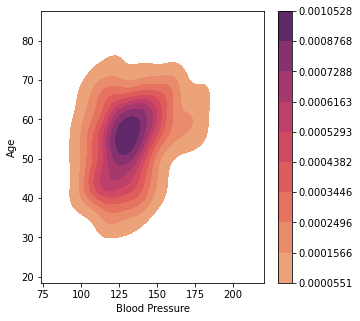

In [18]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=df,x='restingBP',y='age',shade=True,cmap='flare',cbar=True)
plt.xlabel('Blood Pressure')
plt.ylabel('Age');

   - we will use the PairPlot tool from Seaborn to see the distribution and relationships among variables. Since pairplot won't work well with categorical data, we can only see numerical data for this case.

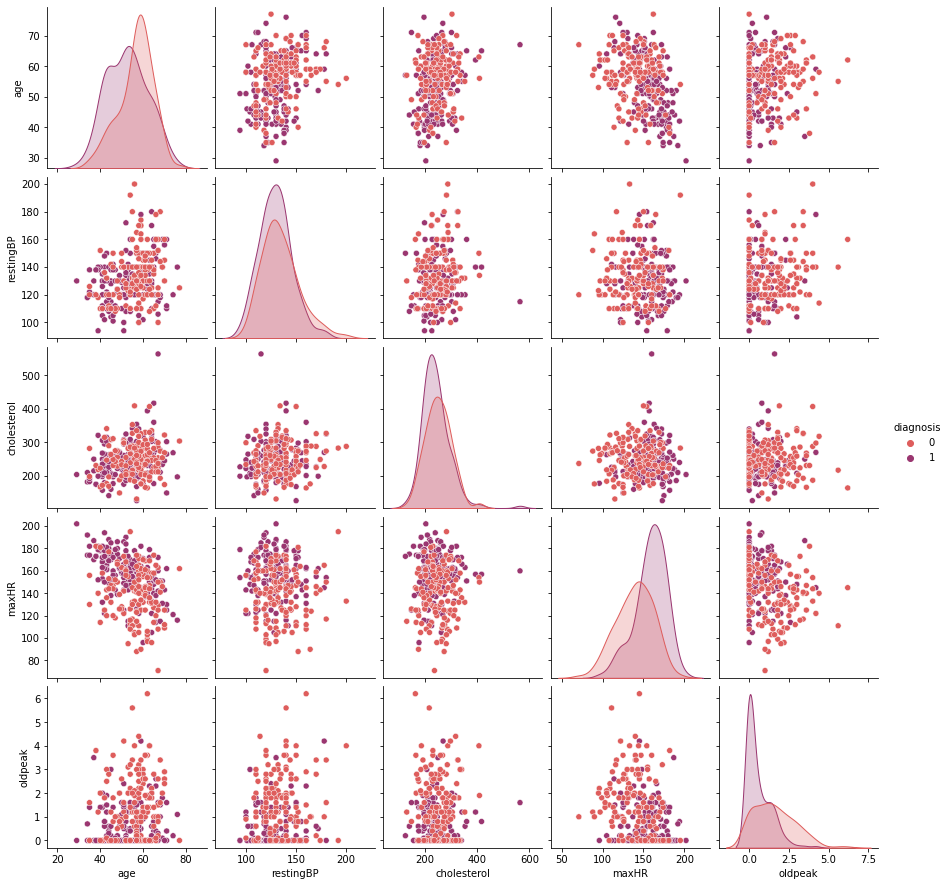

In [19]:
sns.pairplot(df,palette='flare', hue = 'diagnosis')

__Observations:__
There is no significant pattern found in Target against Blood pressure. Blood Pressue might not be good predictor of target.
Other than resting blood pressure, we do see distinct differences between heart disease patients and healthy patients in the targeted attributes.
For instance, we do see an even distribution of heart disease patients in the age category, while healthly patients are more distributed to the right.

__Correlations:__
Correlation is determined by Person's R and can't be defined when the data is categorical. Hence, we are going to do with only numerical variables.

C:\Users\sumai\AppData\Local\Temp\ipykernel_10376\4093429879.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, linewidths=0.1)


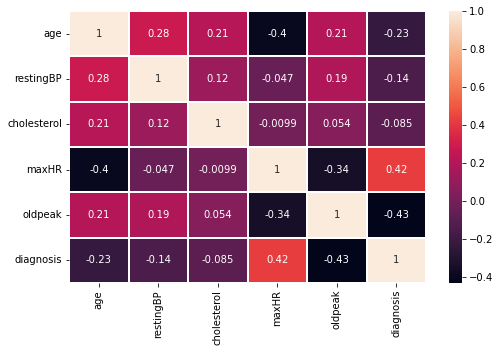

In [20]:
sns.heatmap(df.corr(),annot=True, linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

From here, we can see that with our target variable diagnosis, oldpeack & maxHR have strogest correlation. restingBP & cholesterol have weakest correlation.

## Clasification

## Standardize or Normalize?

 - Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
 
 - Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.
 
However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

Now we are going to check distribution of our variables with QQ-plot.

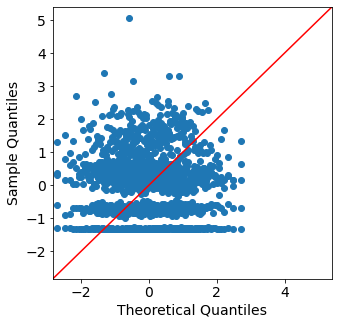

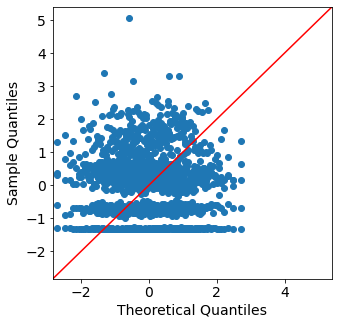

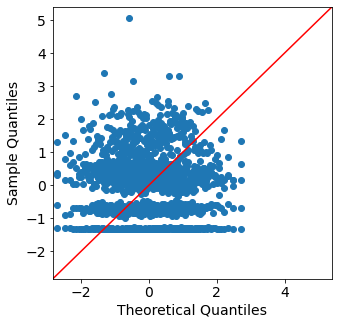

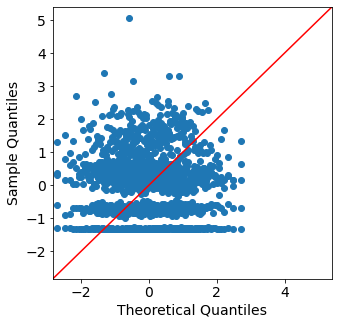

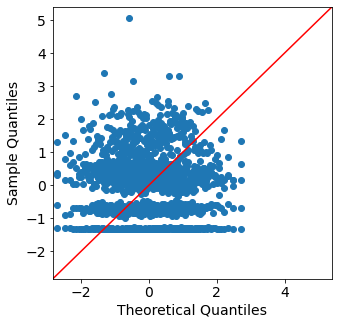

In [24]:
num_df = df[['age','restingBP','cholesterol','maxHR','oldpeak']]
plt.rcParams['figure.figsize'] = [5, 5]
plt.rc('font', size=14)
for columns in num_df.columns:
    qqplot(num_df,fit=True,line="45")
    plt.show()

After looking at QQ-plot we can say our dataframe is not normally distributed so we can do normalization. But we are also going to check which one is going to work best for our model.

In [25]:
#Startified sampaling
df['diagnosis'].value_counts()

1    165
0    138
Name: diagnosis, dtype: int64

In [26]:
# Separate input features and target
X= df.loc[:, df.columns != 'diagnosis'] #independent features
y = df['diagnosis'] #dependent features

### KNN on non-scaled data

In [27]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27)

knn = KNeighborsClassifier()

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

0.5494505494505495


C:\Users\sumai\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Standardization (Standard Scalar)

standardization (or Z-score normalization) means centering the variable at zero and standardizing the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation.
The result of standardization is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with
 __μ=0 and σ=1__
where μ is the mean (average) and σ is the standard deviation from the mean.

Let’s now analyze the basic statistical values of our dataset.

In [28]:
df.describe()

,age,restingBP,cholesterol,maxHR,oldpeak,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


The different variables present different value ranges, therefore different magnitudes. Not only the minimum and maximum values are different, but they also spread over ranges of different widths.

StandardScaler from sci-kit-learn removes the mean and scales the data to unit variance. We can import the StandardScalar method from sci-kit learn and apply it to our dataset.

In [29]:
scaler = StandardScaler() 
X_sc = scaler.fit_transform(X)
X_sc = pd.DataFrame(X_sc, columns= X.columns)

In [30]:
print(X_sc.mean(axis=0))
print(X_sc.std(axis=0))

age             4.690051e-17
sex            -1.407015e-16
chestPain       2.345026e-17
restingBP      -7.035077e-16
cholesterol    -1.113887e-16
bloodSuger     -2.345026e-17
restecg         1.465641e-16
maxHR          -6.800574e-16
exang          -4.690051e-17
oldpeak         2.345026e-17
slope          -1.407015e-16
majorVessels   -2.345026e-17
heartScan      -1.641518e-16
dtype: float64
age             1.001654
sex             1.001654
chestPain       1.001654
restingBP       1.001654
cholesterol     1.001654
bloodSuger      1.001654
restecg         1.001654
maxHR           1.001654
exang           1.001654
oldpeak         1.001654
slope           1.001654
majorVessels    1.001654
heartScan       1.001654
dtype: float64


Now we can see, the mean of each variable is now around zero and the standard deviation is set to 1. Thus, all the variable values lie within the same range.

### KNN on standardize data

In [31]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.30, random_state=27)

In [32]:
# Fit the k-nearest neighbors model to the training data.
knn.fit(X_train, y_train)

# Score the model on the test data.
print(knn.score(X_test, y_test))

0.8681318681318682


C:\Users\sumai\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Normalization (Min-Max Scalar)

We are now going to do normalizaton to check which one is giving more better results for our dataframe. Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

In [33]:
scaler = MinMaxScaler() 
X_n = scaler.fit_transform(X)
X_n = pd.DataFrame(X_n, columns= X.columns)

In [34]:
print('means (Loan Amount, Int rate and Installment): ', X_n.mean(axis=0))
print('std (Loan Amount, Int rate and Installment): ', X_n.std(axis=0))

means (Loan Amount, Int rate and Installment):  age             0.528465
sex             0.683168
chestPain       0.322332
restingBP       0.354941
cholesterol     0.274575
bloodSuger      0.148515
restecg         0.264026
maxHR           0.600358
exang           0.326733
oldpeak         0.167678
slope           0.699670
majorVessels    0.182343
heartScan       0.771177
dtype: float64
std (Loan Amount, Int rate and Installment):  age             0.189210
sex             0.466011
chestPain       0.344017
restingBP       0.165454
cholesterol     0.118335
bloodSuger      0.356198
restecg         0.262930
maxHR           0.174849
exang           0.469794
oldpeak         0.187270
slope           0.308113
majorVessels    0.255652
heartScan       0.204092
dtype: float64


In [35]:
print('Min (Loan Amount, Int rate and Installment): ', X_n.min(axis=0))
print('Max (Loan Amount, Int rate and Installment): ', X_n.max(axis=0))

Min (Loan Amount, Int rate and Installment):  age             0.0
sex             0.0
chestPain       0.0
restingBP       0.0
cholesterol     0.0
bloodSuger      0.0
restecg         0.0
maxHR           0.0
exang           0.0
oldpeak         0.0
slope           0.0
majorVessels    0.0
heartScan       0.0
dtype: float64
Max (Loan Amount, Int rate and Installment):  age             1.0
sex             1.0
chestPain       1.0
restingBP       1.0
cholesterol     1.0
bloodSuger      1.0
restecg         1.0
maxHR           1.0
exang           1.0
oldpeak         1.0
slope           1.0
majorVessels    1.0
heartScan       1.0
dtype: float64


After MinMaxScaling, the distributions are not centered at zero and the standard deviation is not 1. But the minimum and maximum values are standardized across variables, different from what occurs with standardization.

### KNN on normalized data

In [36]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.30, random_state=27)

In [37]:
# Fit the k-nearest neighbors model to the training data.
knn.fit(X_train, y_train)

# Score the model on the test data.
print(knn.score(X_test, y_test))

0.8791208791208791


C:\Users\sumai\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


__Now we can see after Scaling/Normalizing our accuraccy score is increased. That's why we must do Scaling. And for our dataframe normalization is giving best accuracy score. So, for our dataset we should do Normalization.__

## Feature Selection

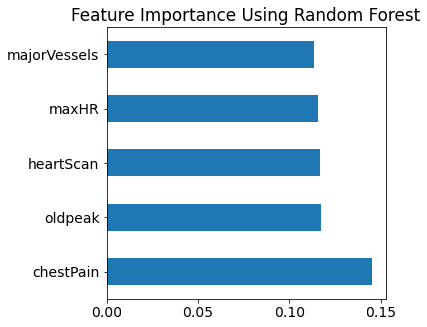

In [39]:
#Feature selection using Random Classifier
model = RandomForestClassifier()
model.fit(X_n,y)

# print(model.feature_importances_) #use inbuilt class feature_importances of random based classifiers

#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_n.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance Using Random Forest")
plt.show()

In [40]:
# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))
 
# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 0.002
The model explains 52.9% of the test set variance
11 features out of 13 selected


In [41]:
# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=13, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)
 
# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))
 
# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

The model can explain 51.8% of the variance in the test set


In [42]:
# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=13, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set')

# Assign the support array to gb_mask
gb_mask =rfe_gb.support_

The model can explain 39.4% of the variance in the test set


In [43]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print(votes)
# Create a mask for features selected by all 3 models
meta_mask = votes == 3

# Apply the dimensionality reduction on X
X_reduced = X_sc.loc[:, meta_mask]

[3 3 3 3 3 2 2 3 3 3 3 3 3]


In [44]:
X_reduced.columns #'bloodSuger','restecg' are droped

Index(['age', 'sex', 'chestPain', 'restingBP', 'cholesterol', 'maxHR', 'exang',
       'oldpeak', 'slope', 'majorVessels', 'heartScan'],
      dtype='object')

 - From feature selection we get 'bloodSuger' & 'restecg' are weakest feture. and from correlation matrix we got cholesterol is weakest feature. We are going to drop it.

In [45]:
# Data frame after dropping features
df1 = df.drop(['bloodSuger','restecg','cholesterol'], axis=1)
df1.head()

,age,sex,chestPain,restingBP,maxHR,exang,oldpeak,slope,majorVessels,heartScan,diagnosis
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


### PCA

In [46]:
# Separate input features and target
X1= df1.loc[:, df1.columns != 'diagnosis'] #independent features
y1 = df1['diagnosis'] #dependent features

In [47]:
scaler = MinMaxScaler() 
X_n1 = scaler.fit_transform(X1)
X_n1 = pd.DataFrame(X_n1, columns= X1.columns)

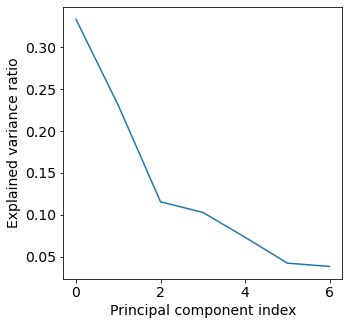

In [48]:
# Checking for how many components should keep
# Build the pipeline
pipe = Pipeline([('reducer', PCA(.90))])

# Fit the pipeline to poke_df and transform the data
pipe.fit(X_n1)
var = pipe['reducer'].explained_variance_ratio_

plt.plot(var)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

From this graph after checking elbow point we can say we should keep 3 components. 

In [49]:
# Applying pca
pca = PCA(n_components=3)
X_pca= pca.fit_transform(X_n1)

In [50]:
print(pca.explained_variance_ratio_)

[0.33309248 0.23048277 0.11537709]


In [51]:
pca.explained_variance_ratio_.sum()

0.6789523369885156

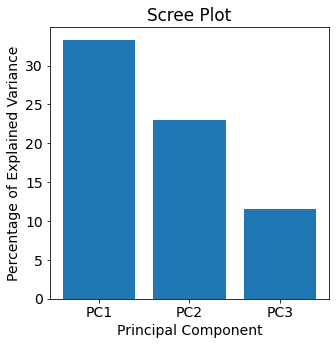

In [52]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt. figure(figsize=(5,5))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [53]:
# This changes the numpy array output back to a DataFrame
X_pc = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3'])

print(X_pc.head())

        PC1       PC2       PC3
0 -0.233667 -0.381383  0.949745
1 -0.116761 -0.394628  0.749248
2 -0.670220  0.428869 -0.260215
3 -0.259938 -0.454086 -0.240411
4  0.210034  0.855425 -0.575952


## KNN 

In [55]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_pc, y1, test_size=0.30, random_state=27)

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
knn_pipeline = make_pipeline(KNeighborsClassifier())

#params for GridSearchCV
param_grid_knn = [{
    'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50],
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}]

knn_cv = GridSearchCV(knn_pipeline, param_grid = param_grid_knn,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  verbose=1,
                  n_jobs=2)

knn_cv.fit(X_train, y_train)
predictions_knn = knn_cv.predict(X_test)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [57]:
knn_cv.best_params_

{'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'distance'}

In [58]:
knn_cv.best_score_

0.8019480519480519

In [59]:
best_grid_knn = knn_cv.best_estimator_
best_grid_knn

Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(weights='distance'))])

In [60]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Precision_score: ', precision_score(y_test, predictions_knn))
print('Recall_score: ', recall_score(y_test, predictions_knn))
print('Accuracy Score: ', accuracy_score(y_test, predictions_knn))

Precision_score:  0.8571428571428571
Recall_score:  0.7346938775510204
Accuracy Score:  0.7912087912087912


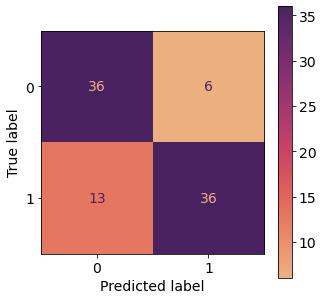

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions_knn, labels=knn_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=knn_cv.classes_)
disp.plot(cmap='flare')

plt.show()

# Logistic regration

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [63]:
print('Accuracy Score: ', accuracy_score(y_test, predictions))
print('Precision_score: ', precision_score(y_test, predictions))
print('Recall_score: ', recall_score(y_test, predictions))

Accuracy Score:  0.8021978021978022
Precision_score:  0.803921568627451
Recall_score:  0.8367346938775511


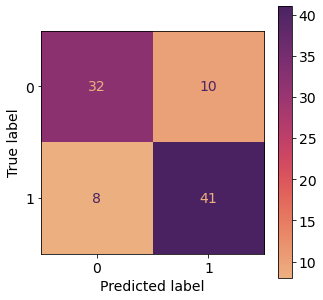

In [64]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot(cmap='flare')

plt.show()

### Classification with strogest two features

From correlation matrix we get 'oldpeack' & maxHR is strongest feature with our target variable.

In [65]:
X2 = df[['oldpeak','maxHR']]
y2 = df['diagnosis']

In [66]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state=27)

### KNN with strongest two feature

In [67]:
#params for GridSearchCV
param_grid_knn = [{
    'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50],
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}]

knn_cv = GridSearchCV(knn_pipeline, param_grid = param_grid_knn,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  verbose=1,
                  n_jobs=2)

knn_cv.fit(X_train, y_train)
predictions_knn = knn_cv.predict(X_test)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


C:\Users\sumai\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [68]:
knn_cv.best_params_

{'kneighborsclassifier__algorithm': 'brute',
 'kneighborsclassifier__n_neighbors': 20,
 'kneighborsclassifier__p': 1,
 'kneighborsclassifier__weights': 'uniform'}

In [69]:
knn_cv.best_score_

0.7168831168831169

In [70]:
best_grid_knn = knn_cv.best_estimator_
best_grid_knn

Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='brute', n_neighbors=20, p=1))])

Precision_score:  0.7083333333333334
Recall_score:  0.6938775510204082
Accuracy Score:  0.6813186813186813


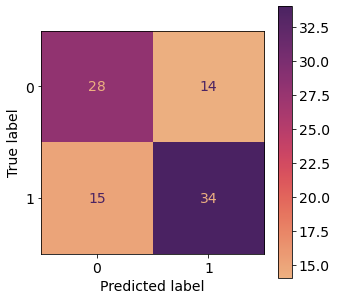

In [71]:
print('Precision_score: ', precision_score(y_test, predictions_knn))
print('Recall_score: ', recall_score(y_test, predictions_knn))
print('Accuracy Score: ', accuracy_score(y_test, predictions_knn))

cm = confusion_matrix(y_test, predictions_knn, labels=knn_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=knn_cv.classes_)
disp.plot(cmap='flare')

plt.show()

### Logistic with strongest two feature

In [72]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [73]:
print('Accuracy Score: ', accuracy_score(y_test, predictions))
print('Precision_score: ', precision_score(y_test, predictions))
print('Recall_score: ', recall_score(y_test, predictions))

Accuracy Score:  0.7142857142857143
Precision_score:  0.7169811320754716
Recall_score:  0.7755102040816326


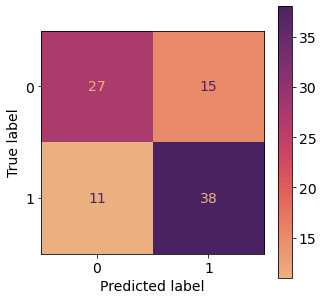

In [74]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot(cmap='flare')

plt.show()

__After using only two storengest our accuraccy has been dropped down__

### Probability Calibration curves

In [75]:
lr = LogisticRegression(C=1.0)
knn = KNeighborsClassifier()
knn_isotonic = CalibratedClassifierCV(knn, cv=2, method="isotonic")
knn_sigmoid = CalibratedClassifierCV(knn, cv=2, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (knn, "KNeighbors"),
    (knn_isotonic, "KNeighbors + Isotonic"),
    (knn_sigmoid, "KNeighbors + Sigmoid"),
]

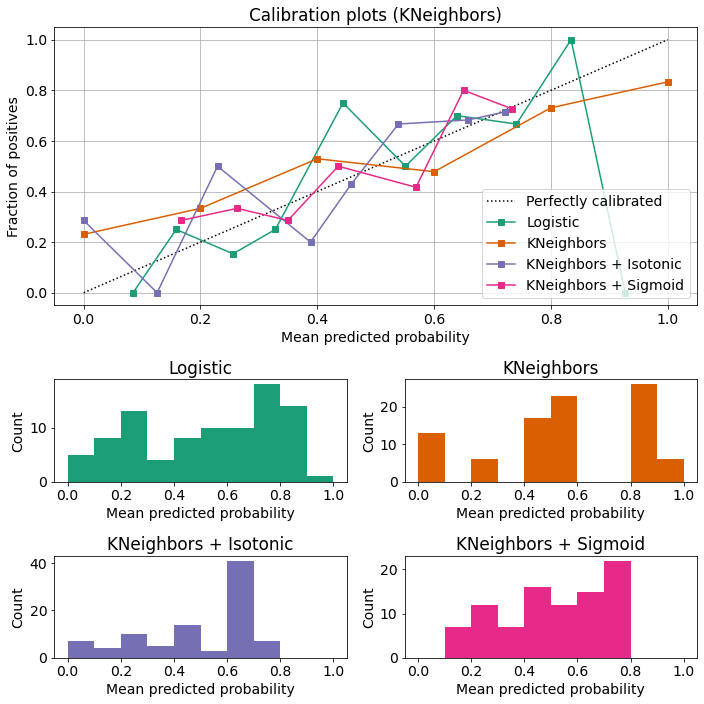

In [76]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (KNeighbors)")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

## Summary

This dataset shows the reasons for heart failure. From all of the work, we get to know that ST depression induced by exercise relative to rest and Maximum heart rate achieved can Be the main reasons for heart disease. But they are not only the reasons. The other health issue is the reasons for heart disease.